In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
image=mpimg.imread('test.jpg')
print('This image is: ', type(image), 
         'with dimensions:', image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [10]:
ysize = image.shape[0]
xsize = image.shape[1]
line_image = np.copy(image)
color_select=np.copy(image)

In [18]:
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [25]:
left_bottom = [120, 539]
right_bottom = [800, 539]
apex = [470, 300]


In [26]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [27]:
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])


In [28]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [29]:
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

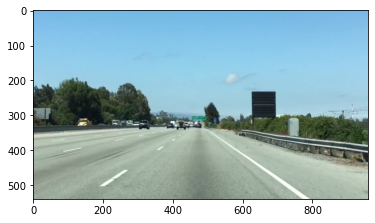

In [32]:
# Display our two output images
plt.imshow(image)


In [34]:
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]

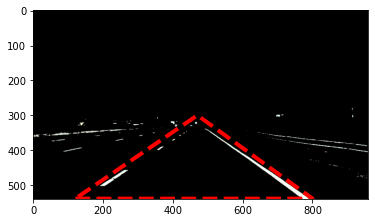

In [40]:
plt.plot(x, y, 'r--', lw=4)
plt.imshow(color_select)

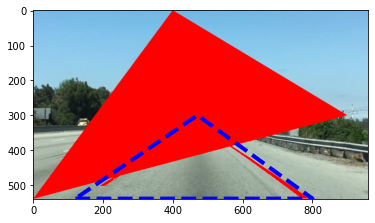

In [39]:
plt.plot(x, y, '--', lw=4)
plt.imshow(line_image)